# Goal: To identity the bike models from the image using Computer Vision (CV2)

### Models like Ducati, Harley Davidson, KTM, Kawasaki, Suzuki & Other model.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing.image import img_to_array, image
from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
import numpy as np 
import cv2  
import os
import matplotlib.pyplot as plt
print("Setup Complete")

Setup Complete


Loading a trainimage...


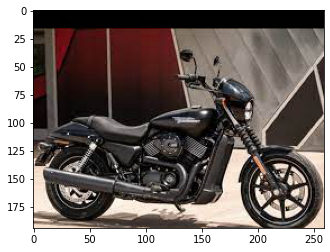

In [2]:
print("Loading a trainimage...")
img = load_img("Datasets\Train\Harley_Davidson\Harley_3.jpg")
plt.imshow(img)

In [3]:
cv2.imread('Datasets\Train\Harley_Davidson\Harley_3.jpg').shape

(194, 259, 3)

In [4]:
train = ImageDataGenerator(rescale=1./255)
validation_data = ImageDataGenerator(rescale=1./255)

In [5]:
train_data = train.flow_from_directory('Datasets\Train',
                                       target_size=(200, 200),
                                       batch_size= 10,
                                       class_mode='categorical')

validation_data = train.flow_from_directory('Datasets\Validation',
                                       target_size=(200, 200),
                                       batch_size= 2,
                                       class_mode='categorical')

Found 339 images belonging to 6 classes.
Found 32 images belonging to 6 classes.


In [6]:
input_shape = (200, 200, 3)

In [7]:
print(train_data.class_indices)

{'Ducati': 0, 'Harley_Davidson': 1, 'KTM': 2, 'Kawasaki': 3, 'Other': 4, 'Suzuki': 5}


In [8]:
print(validation_data.class_indices)                      

{'Ducati': 0, 'Harley Davidson': 1, 'KTM': 2, 'Kawasaki': 3, 'Other': 4, 'Suzuki': 5}


In [9]:
print(train_data.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5]


In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    
                                    tf.keras.layers.Dense(6, activation='softmax')
                                    ])

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [12]:
model_fit = model.fit(train_data, epochs=30, validation_data=validation_data)


Epoch 1/30
34/34 [==============================] - 13s 357ms/step - loss: 1.8025 - accuracy: 0.3274 - val_loss: 1.6541 - val_accuracy: 0.1875
Epoch 2/30
34/34 [==============================] - 11s 333ms/step - loss: 1.1599 - accuracy: 0.5457 - val_loss: 1.8129 - val_accuracy: 0.5000
Epoch 3/30
34/34 [==============================] - 12s 341ms/step - loss: 0.7576 - accuracy: 0.7345 - val_loss: 1.6801 - val_accuracy: 0.5625
Epoch 4/30
34/34 [==============================] - 11s 333ms/step - loss: 0.4466 - accuracy: 0.8614 - val_loss: 2.4025 - val_accuracy: 0.5000
Epoch 5/30
34/34 [==============================] - 12s 353ms/step - loss: 0.1941 - accuracy: 0.9587 - val_loss: 2.4866 - val_accuracy: 0.4688
Epoch 6/30
34/34 [==============================] - 11s 322ms/step - loss: 0.0454 - accuracy: 0.9941 - val_loss: 3.0173 - val_accuracy: 0.4688
Epoch 7/30
34/34 [==============================] - 10s 297ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 2.7572 - val_accuracy: 0.5312

In [13]:
model.save('model_cv2.h5')

In [14]:
# Loading the test data from the local machine

dir_path = 'Datasets\Test_Samples'

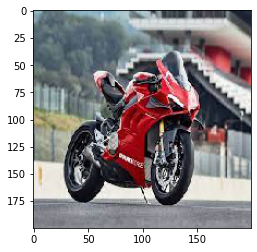

This is a Ducati bike


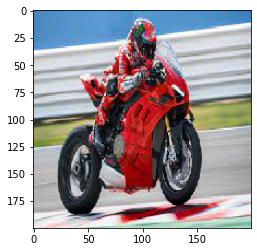

This is a Ducati bike


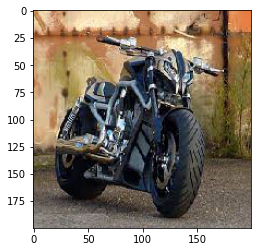

This is a Harley Davidson bike


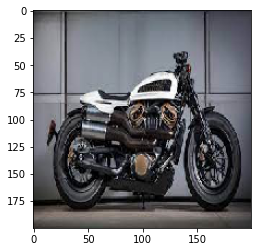

This is a Harley Davidson bike


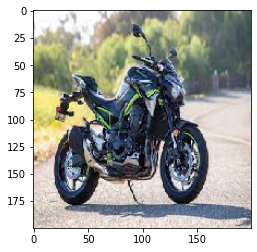

This is a Kawasaki bike


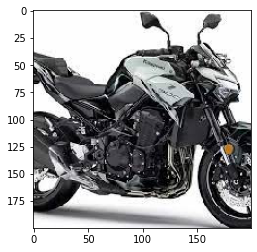

This is a Suzuki Hayabusa bike


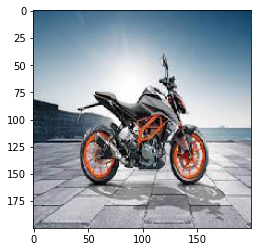

This is a KTM bike


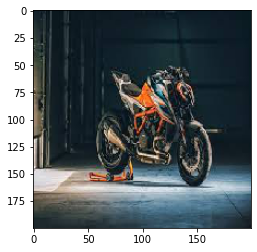

This is a KTM bike


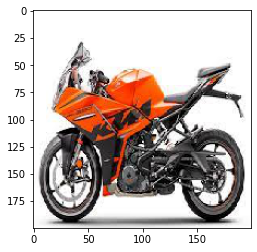

This is a KTM bike


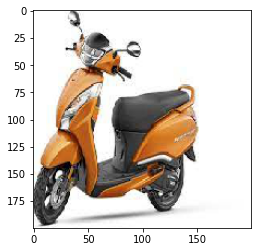

This is not a bike or other model


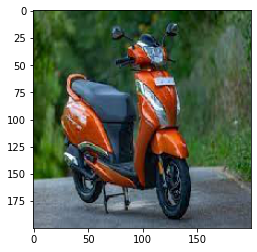

This is not a bike or other model


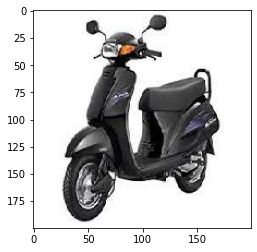

This is not a bike or other model


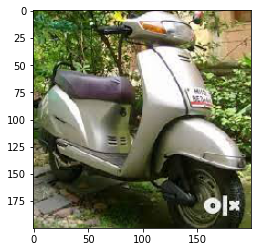

This is not a bike or other model


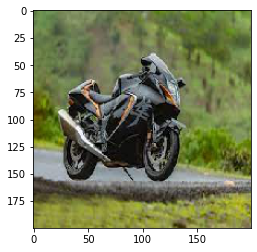

This is a Suzuki Hayabusa bike


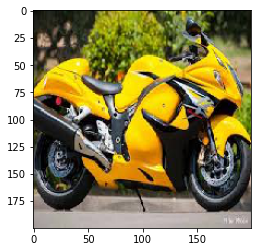

This is a Suzuki Hayabusa bike


In [15]:
# Listing all the files in the directory

for i in os.listdir(dir_path):
    test_images = len(os.listdir(dir_path))
    img = image.load_img(dir_path + '\\' + i, target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    
# Converting the image to a numpy array   

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
# Loading the model  

    bike_classes = model.predict(images)
    bike_classes = np.argmax(bike_classes, axis=1)
    
# Printing the results   

    if bike_classes == 0:
        print("This is a Ducati bike")
    elif bike_classes == 1:
        print("This is a Harley Davidson bike")
    elif bike_classes == 2:
        print("This is a KTM bike")
    elif bike_classes == 3:
        print("This is a Kawasaki bike")
    elif bike_classes == 5:
        print("This is a Suzuki Hayabusa bike")
    else:
        print("This is not a bike or other model")